In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
data = np.genfromtxt("../l2_data.txt", delimiter=",", dtype=np.float128)

In [116]:
# Preparing data
def split_data(data):
    _, columns_count = data.shape
    return data[:, 0:columns_count - 1], data[:, columns_count - 1]

def add_bias(data):
    examples_count, columns_count = data.shape
    bias = np.ones((examples_count, columns_count + 1))
    bias[:, 1:] = data
    return bias

def normalize(data):
    examples_count, columns_count = data.shape
    for i in range(columns_count - 1):
        feature = data[:, i]
        data[:, i] = (feature - feature.min()) / (feature.max() - feature.min())
    return data

In [117]:
# Hypothesis function
def hypothesis(thetas, features):
    a = 1 / (1 + np.exp(-np.dot(thetas, features.T)))
    if a is np.array:
        a[np.where(a == 0)] = 10 ** -9
        a[np.where(a == 1)] = 0.999999
    return a

In [118]:
# Cost function
def cost(thetas, features, y):
    examples_count, _ = features.shape
    return (1 / examples_count) * (np.dot(-y, np.log(hypothesis(thetas, features)).T) - \
                                   np.dot(1 - y, np.log(1 - hypothesis(thetas, features)).T))

In [139]:
# Learning
def theta_update(thetas, features, y, learning_rate):
    examples_count, _ = features.shape
    return learning_rate * np.dot(hypothesis(thetas, features) - y, features) / examples_count

def theta_regularization(thetas, features, y, regularization_rate):
    examples_count, _ = features.shape
    thetas_r = (regularization_rate / examples_count) * thetas
    thetas_r[(0, 0)] = 0
    return thetas_r

def train(data, iterations, learning_rate, regularization_rate):
    data_normalized = normalize(data)
    data_bias = add_bias(data_normalized)
    features, y = split_data(data_bias)
    _, features_count = features.shape
    thetas = np.zeros((1, features_count))
    costs = np.zeros((1, iterations))
    for i in range(iterations):
        costs[(0, i)] = cost(thetas, features, y)
        thetas = thetas - (theta_update(thetas, features, y, learning_rate) + \
                           theta_regularization(thetas, features, y, regularization_rate))
    return thetas, costs

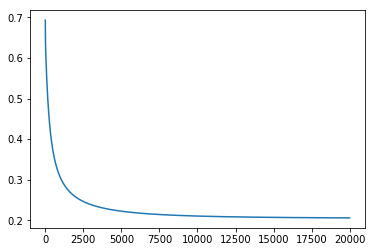

In [142]:
thetas, costs = train(data, 20000, 0.2, 0.001)
plt.plot(costs.T)
plt.show()